In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from datetime import time

In [14]:
def parser(path):
    stops_ = pd.read_csv(path + 'stops.txt')
    stop_times = pd.read_csv(path + 'stop_times.txt')
    trips = pd.read_csv(path + 'trips.txt')
    routes = pd.read_csv(path + 'routes.txt')
    
    stops_['stop_id'] = stops_['stop_id'].astype(str)
    stop_times['stop_id'] = stop_times['stop_id'].astype(str)
    stop_times_trips = stop_times.merge(trips, on='trip_id', how='left').sort_values(by=['trip_id', 'stop_sequence'])
    stop_times_trips['stop_id'] = stop_times_trips['stop_id'].astype(str)  

    data_ = stop_times_trips.merge(routes[['route_id', 'route_type']], on='route_id', how='left')
    data_ = data_.merge(stops_[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']], on='stop_id', how='left')

    return data_

In [15]:
def preprocess_time_data(data_):
    def convert_time(time_str):
        hour, minute, second = map(int, time_str.split(":"))
        hour = hour % 24 
        return time(hour, minute, second)
    
    data_['arrival_time'] = data_['arrival_time'].apply(convert_time)
    data_['departure_time'] = data_['departure_time'].apply(convert_time)
    return data_

In [16]:
data = parser('data/')
data = preprocess_time_data(data)

In [17]:
def get_graph(data_):
    G_ = nx.Graph()
    node_attributes = data_[['stop_id', 'stop_name', 'stop_lon', 'stop_lat']].drop_duplicates()
    G_.add_nodes_from((row['stop_id'], {'name': row['stop_name'], 'pos': (row['stop_lon'], row['stop_lat'])}) for _, row in node_attributes.iterrows())

    grouped = data_.groupby('trip_id')['stop_id'].apply(list)
    edges_ = [(stops[i], stops[i + 1]) for stops in grouped for i in range(len(stops) - 1)]
    G_.add_edges_from(edges_)
    return G_

In [18]:
def print_graph_with_coordiantes(G_):
    plt.figure(figsize=(10, 10))
    nx.draw(G_, nx.get_node_attributes(G_, 'pos'), node_size=6, node_color='navy', width=0.6)
    plt.show()

In [19]:
G = get_graph(data)

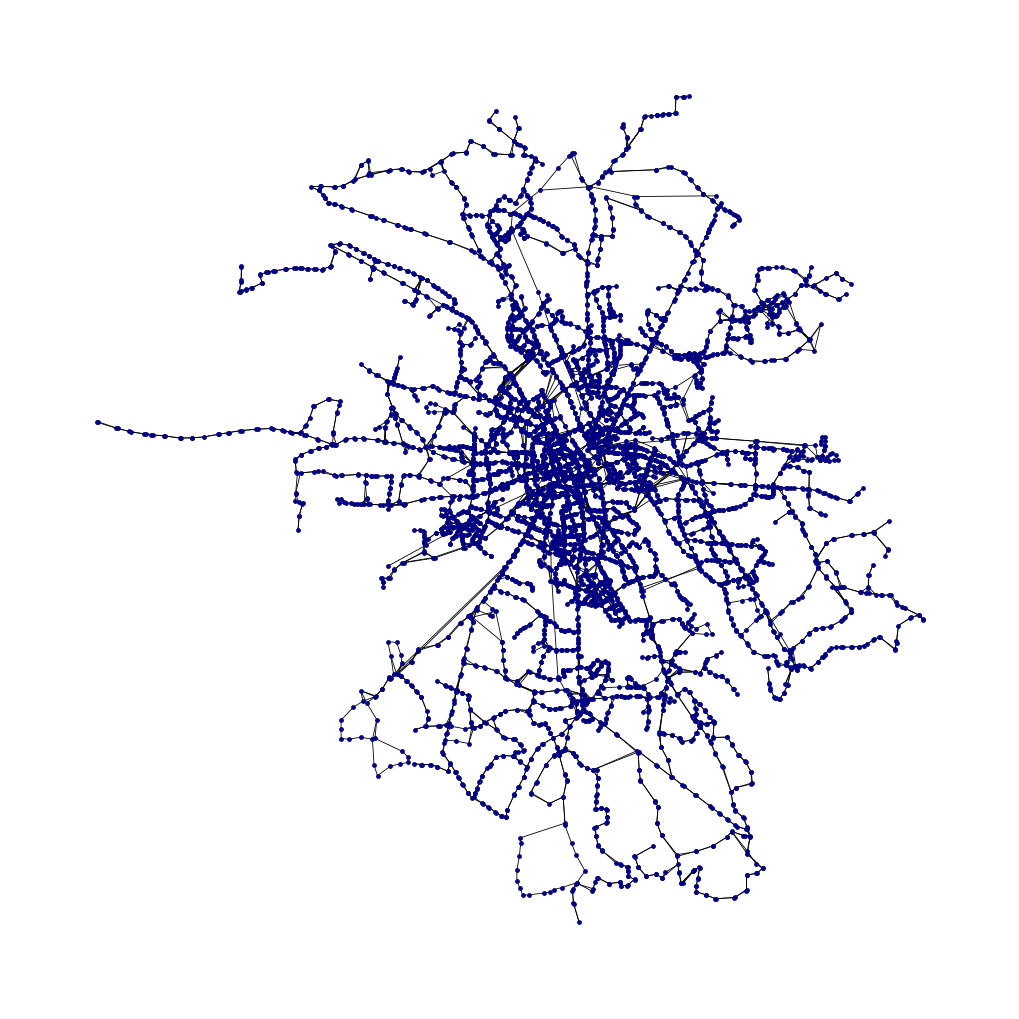

In [20]:
print_graph_with_coordiantes(G)